In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np

In [27]:
data = Table.read("tc-apogee-dr12-regularized-release.fits.gz")

In [37]:
from collections import Counter
fields = np.array([each.strip() for each in data["FIELD"]])
counter_fields = Counter(fields)

cluster_candidate_fields = {}
for k, v in counter_fields.items():
    if k.startswith(("M", "N", "P")):
        cluster_candidate_fields[k] = v
        print(k, v)

print("Sum: {}".format(sum(cluster_candidate_fields.values())))

N4147 94
M54SGRC1 366
N6229 289
N188 240
M2 130
N7789 315
N5634SGR2 201
M5PAL5 301
M35N2158 188
N6819 302
M3 91
M53 150
M107 850
M92 374
M15 432
N2243 186
NGP 43
Pleiades 1
M67 180
M71 407
PAL1 329
N2420 592
N1333 378
N6791 169
N5466 94
M13 307
Sum: 7009


/home/acas0005/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


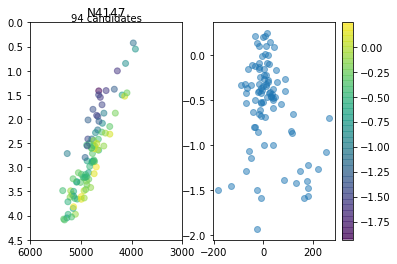

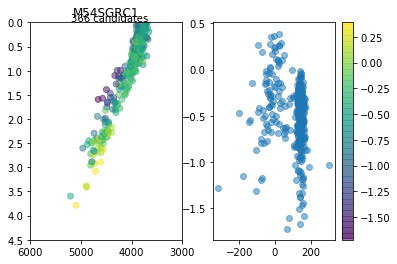

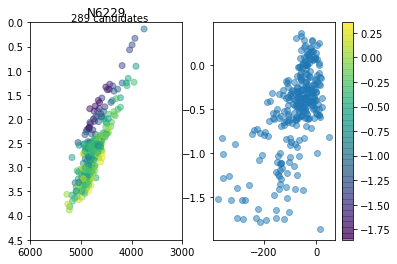

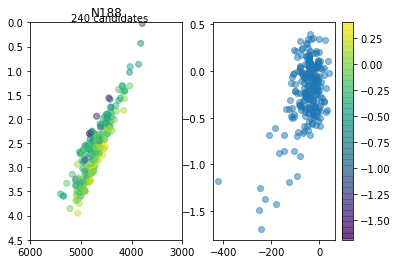

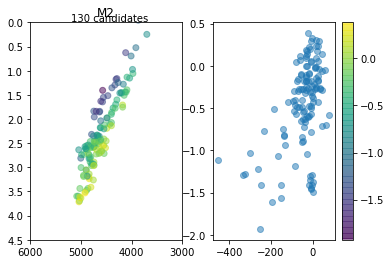

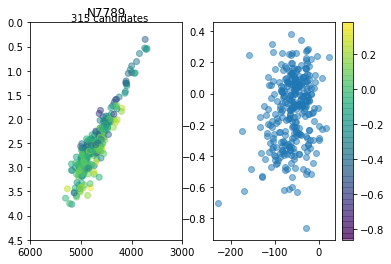

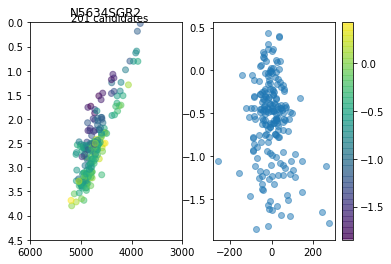

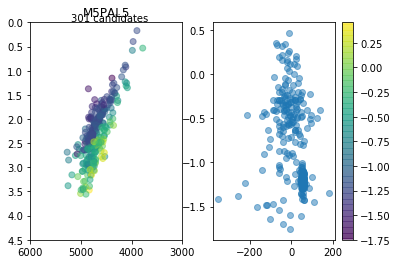

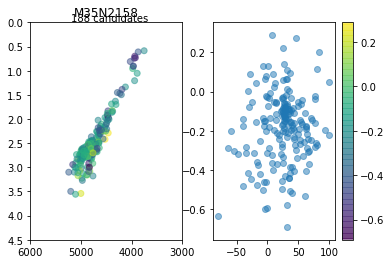

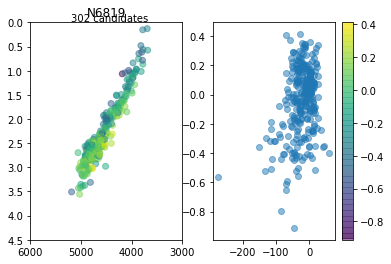

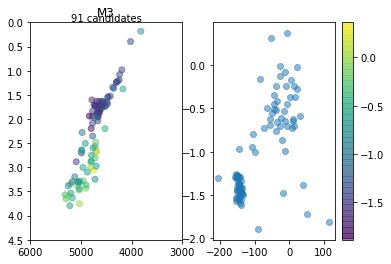

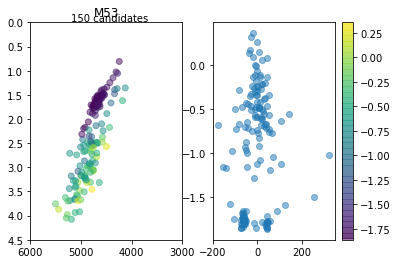

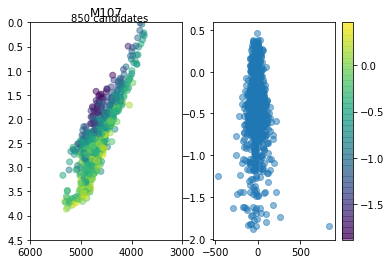

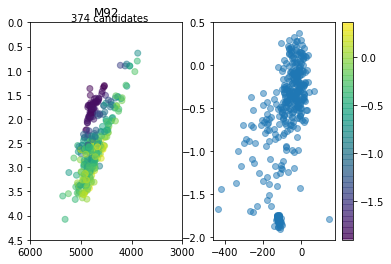

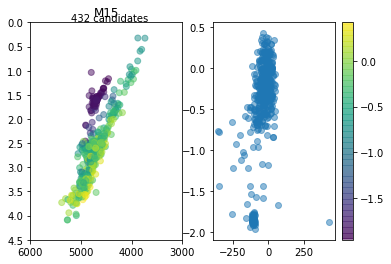

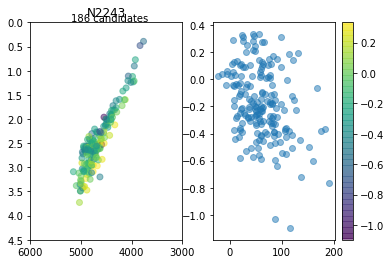

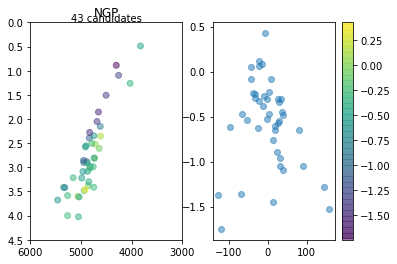

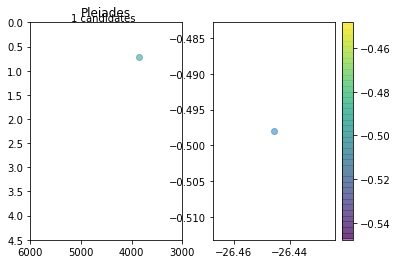

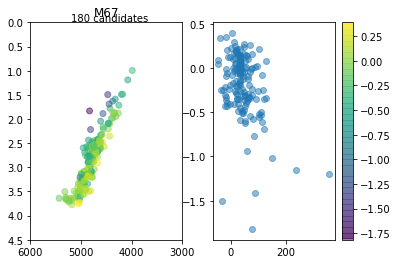

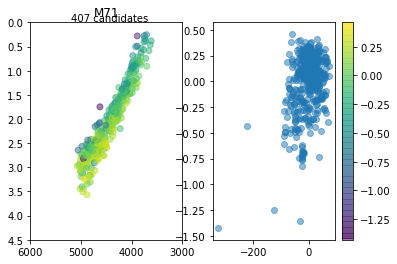

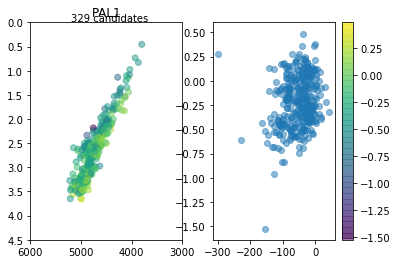

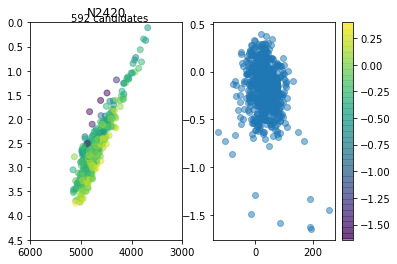

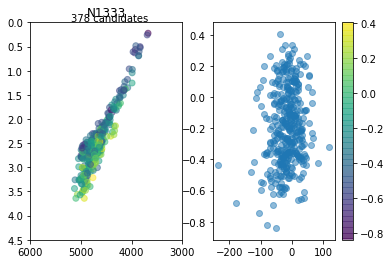

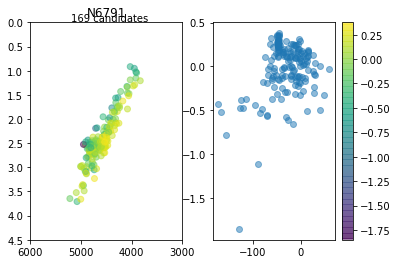

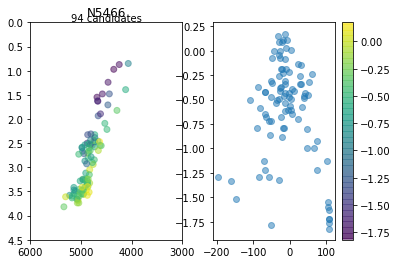

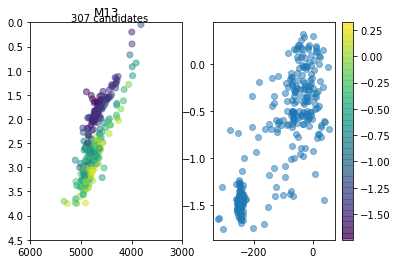

In [44]:
# Plot and cull.
for cluster_name, num_candidates in cluster_candidate_fields.items():
    candidate = (fields == cluster_name) * np.isfinite(data["TEFF"])
    fig, axes = plt.subplots(1, 2)
    
    axes[0].set_title(cluster_name)
    scat = axes[0].scatter(data["TEFF"][candidate], data["LOGG"][candidate], c=data["FE_H"][candidate],
                          alpha=0.5)

    axes[0].set_xlim(6000, 3000)
    axes[0].set_ylim(4.5, 0)
    
    axes[0].text(0.05, 0.95, "{} candidates".format(candidate.sum()), transform=ax.transAxes)
    
    axes[1].scatter(data["VHELIO_AVG"][candidate], data["FE_H"][candidate], alpha=0.5)
        
    cbar = plt.colorbar(scat)
    
    

In [ ]:
membership_criteria = {
    # Cluster: (low_vel, upper_vel, low_feh, upper_feh)
    "M54SGRC1": (100, 200, None, None),
    "N6229": (-125, -175, -0.76, -1.5),
    "M2": (-50, +50, -1.25, -1.75),
    "M5PAL5": (25, 75, -0.75, -1.5),
    "M3": (-125, -175, -1, -2),
    "M53": (-25, -125, -1.5, -2),
    "M92": (-50, -200, -1.75, -2),
    "M15": (-250, 0, -1.75, -2),
    "M67": (None, None, -0.5, 0.5),
    "M71": (-30, -15, -0.5, -1.0),
    "N5466": (100, 200, None, None),
    "M13": (-225, -275, -1.0, -2.0)
}
